In [2]:
# CSV data extraction
import csv

def getCSV(path):
    t = [] # column 0
    data1 = [] # column 1
    data2 = [] # column 2

    with open(path) as f:
        # open the csv file
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            t.append(float(row[0])) # leftmost column
            data1.append(float(row[1])) # second column
            #data2.append(float(row[2])) # third column
    return t, data1

def displayCSV(path):
    t, data1 = getCSV(path)
    for i in range(len(t)):
        # print the data to verify it was read
        print(str(t[i]) + ", " + str(data1[i]))

def sample_rate(path):
    t, data1 = getCSV(path)
    num_vals = len(data1)
    total_time = t[-1]
    sample_rate = num_vals / total_time
    return sample_rate



In [207]:
import matplotlib.pyplot as plt
import numpy as np

def FFT(path):
    t, data1 = getCSV(path)

    Fs = sample_rate(path) # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data1
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.show()



### Q4: FFT for all the datas

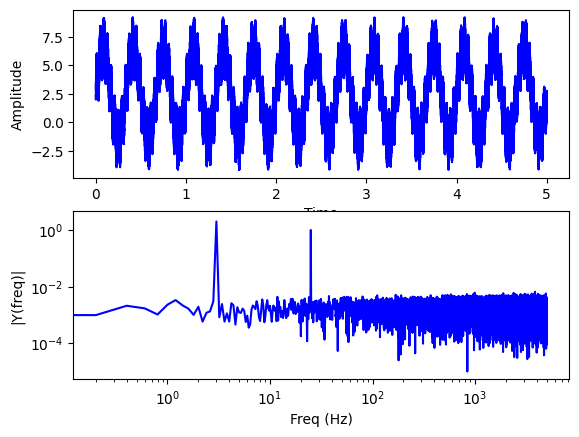

In [7]:
FFT('sigA.csv')

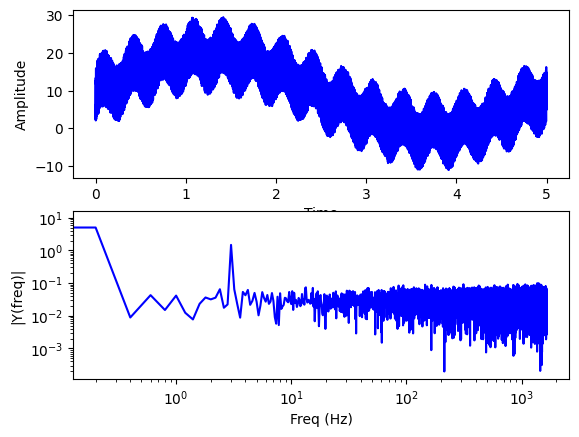

In [8]:
FFT('sigB.csv')

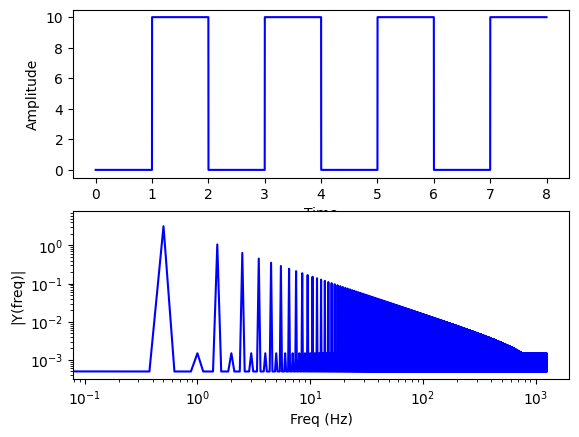

In [9]:
FFT('sigC.csv')

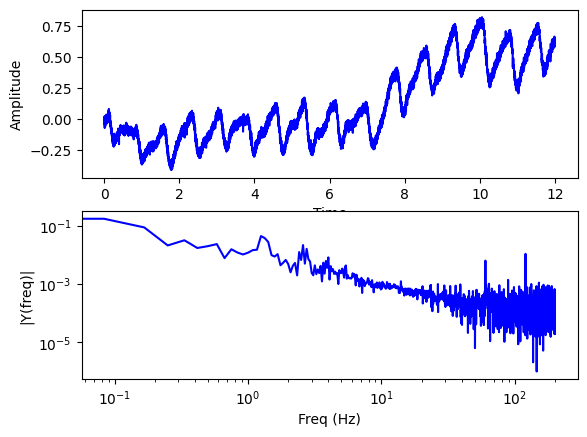

In [10]:
FFT('sigD.csv')

### Q5: Moving Average Filter
For CSV A, B, C, and D

In [121]:
def MAF(t, data, X):
    data_new = []
    for i in range(len(data) - X + 1):
        filter = data[i:i+X]
        avg = sum(filter) / X
        data_new.append(avg)
    t_new = t[X-1::]
    return t_new, data_new

def MAF_compare_plots(t, data, X):
    t1, data1 = MAF(t, data, X)
    plt.plot(t,data,'black') # plotting the fft
    plt.plot(t1,data1,'r')
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    plt.title("X = %d" % X)
    plt.show()


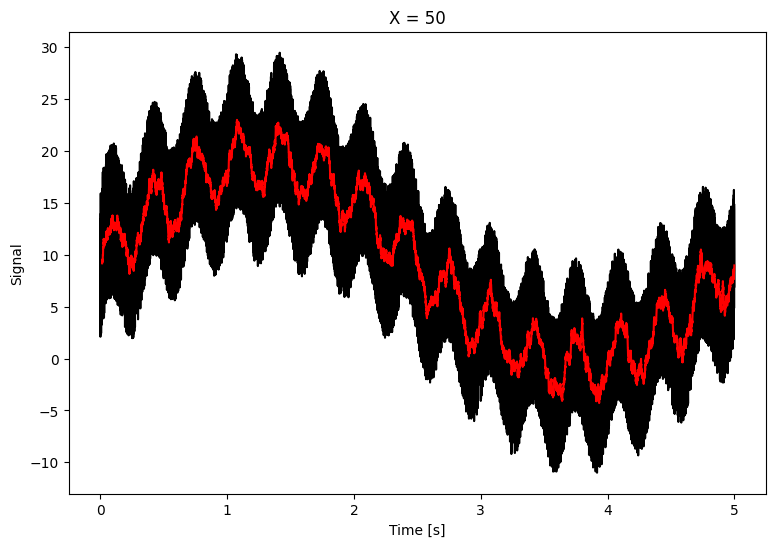

In [164]:
plt.rcParams['figure.figsize'] = (9, 6)
t, data = getCSV('sigB.csv')
MAF_compare_plots(t, data, 50)

### IIR Filter


In [141]:
def IIR(data, A, B):
    data_new = [data[0]]  # Initialize the filtered signal with the first value of the input signal
    for i in range(1, len(data)):
        new_average = A * data_new[i-1] + B * data[i]
        data_new.append(new_average)
    return data_new

def IIR_compare_plots(t, data, A, B):
    data1 = IIR(data, A, B)
    plt.plot(t,data,'black') # plotting the fft
    plt.plot(t,data1,'r')
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    plt.title("A = %.2f and B = %.2f" % (A, B))
    plt.show()


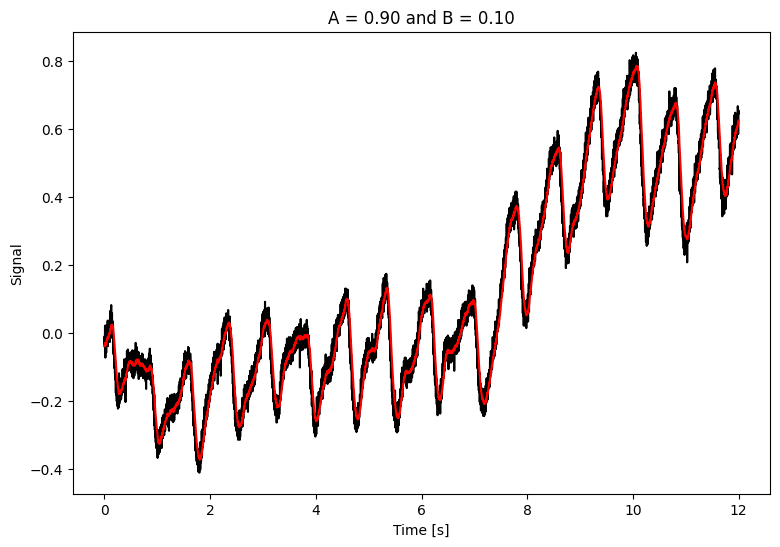

In [171]:
plt.rcParams['figure.figsize'] = (9, 6)
t, data = getCSV('sigD.csv')
IIR_compare_plots(t, data, .9, .1)

### FIR

In [208]:
h = [
    0.000000000000000000,
    -0.000004317888940082,
    0.000037789741610034,
    0.000234507504678386,
    0.000738349245396795,
    0.001752056965863594,
    0.003520857495765717,
    0.006307375531611883,
    0.010349827459198182,
    0.015809004635996021,
    0.022713749708606873,
    0.030916962651244984,
    0.040073853831984502,
    0.049651004183465561,
    0.058969298398032388,
    0.067277065956497351,
    0.073843256641912894,
    0.078055675741604477,
    0.079507364390940430,
    0.078055675741604477,
    0.073843256641912894,
    0.067277065956497378,
    0.058969298398032416,
    0.049651004183465568,
    0.040073853831984516,
    0.030916962651244984,
    0.022713749708606873,
    0.015809004635996028,
    0.010349827459198189,
    0.006307375531611879,
    0.003520857495765725,
    0.001752056965863595,
    0.000738349245396796,
    0.000234507504678386,
    0.000037789741610034,
    -0.000004317888940082,
    0.000000000000000000,
]

import numpy as np

def FIR(data, weights):
    new_data = np.convolve(data, weights, mode='same')
    return new_data

def FIR_compare_plots(t, data, h):
    new_data = FIR(data, h)
    plt.plot(data, color='black')
    plt.plot(new_data, color='red')
    plt.title(f"FIR ({len(h)} weights), Blackman Window, Cutoff = 12 Hz, Bandwith = 52Hz")
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.show()



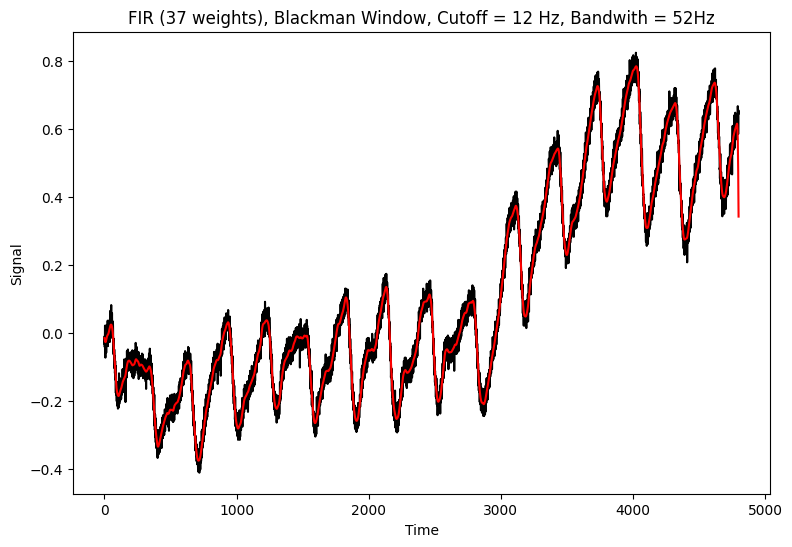

In [209]:
plt.rcParams['figure.figsize'] = (9, 6)
t, data = getCSV('sigD.csv')
FIR_compare_plots(t, data, h)